# EDA 과제
## 2020112167 민장규
### houses 데이터셋을 이용해 데이터간 상관관계를 분석하고 시각화하는 과제
### 집값과 관계된 수많은 요소 중 관련이 있는 것은 무엇일까에 대한 탐색적 분석 진행

In [30]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [31]:
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")
houses = houses_data.data 

houses.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.50,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.00,3,hot air,gas,public/commercial,No,Yes,Yes


In [32]:
print(houses_data.__doc__)  # documents

.. container::

   ============== ===============
   SaratogaHouses R Documentation
   ============== ===============

   .. rubric:: Houses in Saratoga County (2006)
      :name: SaratogaHouses

   .. rubric:: Description
      :name: description

   Data on houses in Saratoga County, New York, USA in 2006

   .. rubric:: Usage
      :name: usage

   .. code:: R

      data(SaratogaHouses)

   .. rubric:: Format
      :name: format

   A data frame with 1728 observations on the following 16 variables.

   -  ``price`` price (US dollars)

   -  ``lotSize`` size of lot (acres)

   -  ``age`` age of house (years)

   -  ``landValue`` value of land (US dollars)

   -  ``livingArea`` living are (square feet)

   -  ``pctCollege`` percent of neighborhood that graduated college

   -  ``bedrooms`` number of bedrooms

   -  ``fireplaces`` number of fireplaces

   -  ``bathrooms`` number of bathrooms (half bathrooms have no shower
      or tub)

   -  ``rooms`` number of rooms

   -  ``heating

### 각 feature 의미

   -  ``price`` price (US dollars)

   -  ``lotSize`` size of lot (acres)

   -  ``age`` age of house (years)

   -  ``landValue`` value of land (US dollars)

   -  ``livingArea`` living are (square feet)

   -  ``pctCollege`` percent of neighborhood that graduated college

   -  ``bedrooms`` number of bedrooms

   -  ``fireplaces`` number of fireplaces

   -  ``bathrooms`` number of bathrooms (half bathrooms have no shower or tub)

   -  ``rooms`` number of rooms

   -  ``heating`` type of heating system

   -  ``fuel`` fuel used for heating

   -  ``sewer`` type of sewer system

   -  ``waterfront`` whether property includes waterfront

   -  ``newConstruction`` whether the property is a new construction

   -  ``centralAir`` whether the house has central air

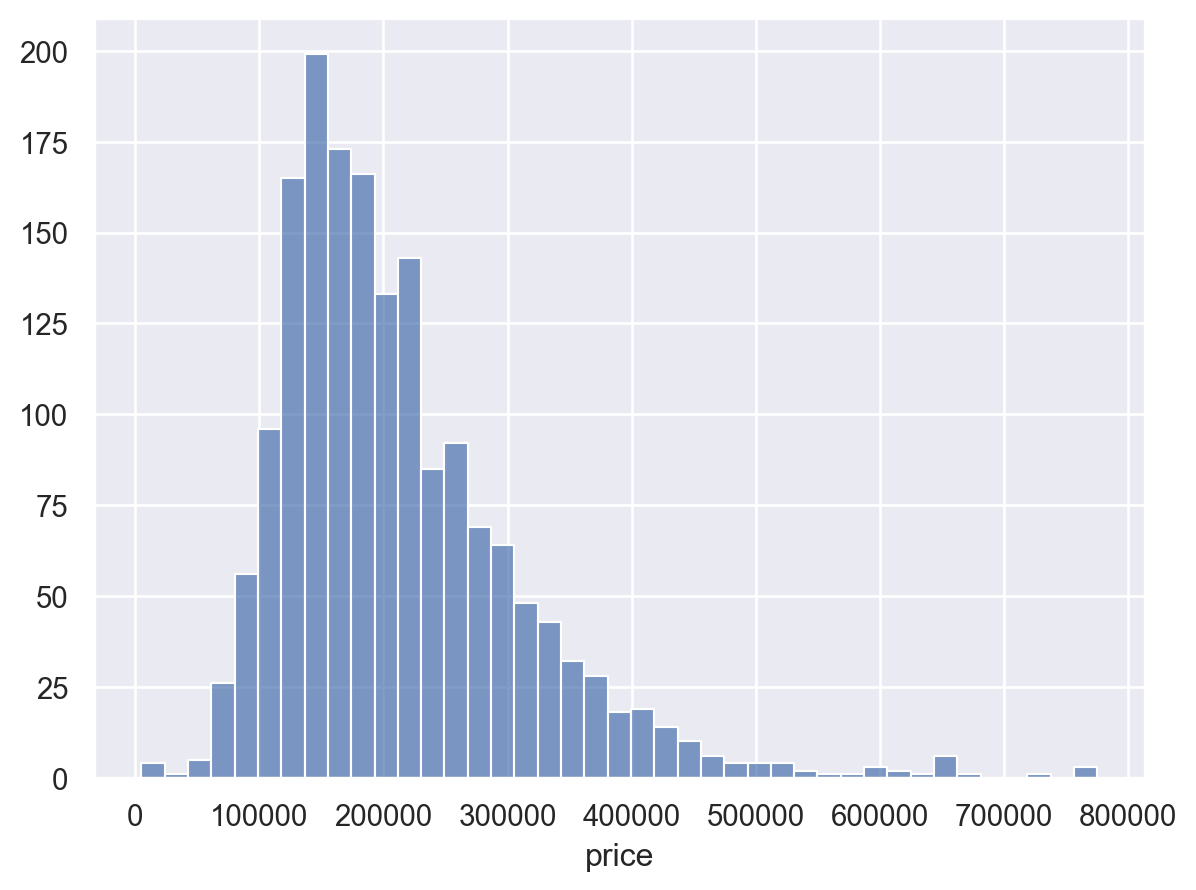

In [33]:
(
    so.Plot(houses, x="price")
    .add(so.Bars(), so.Hist())
)

### Q. 어떤 종류의 연료를 사용하며 그 분포는 어떠한가?
A. electric, gas, oil 3종류를 사용하며 분포상 gas가 가장 많이 쓰이고 그 이후로 electric, oil 순으로 따라가는 추새이다.
### Q. 어떤 연료를 사용하는지가 집 값을 결정하는데 어떻게 관계를 맺는가?
A. 어떤 연료를 사용하는지가 집 값을 결정하는데 결정적인 역할을 한다고는 할 수 없다. 다만, gas를 사용하는 집에서 price가 높은 집이 많은 정도는 확인할 수 있었다.

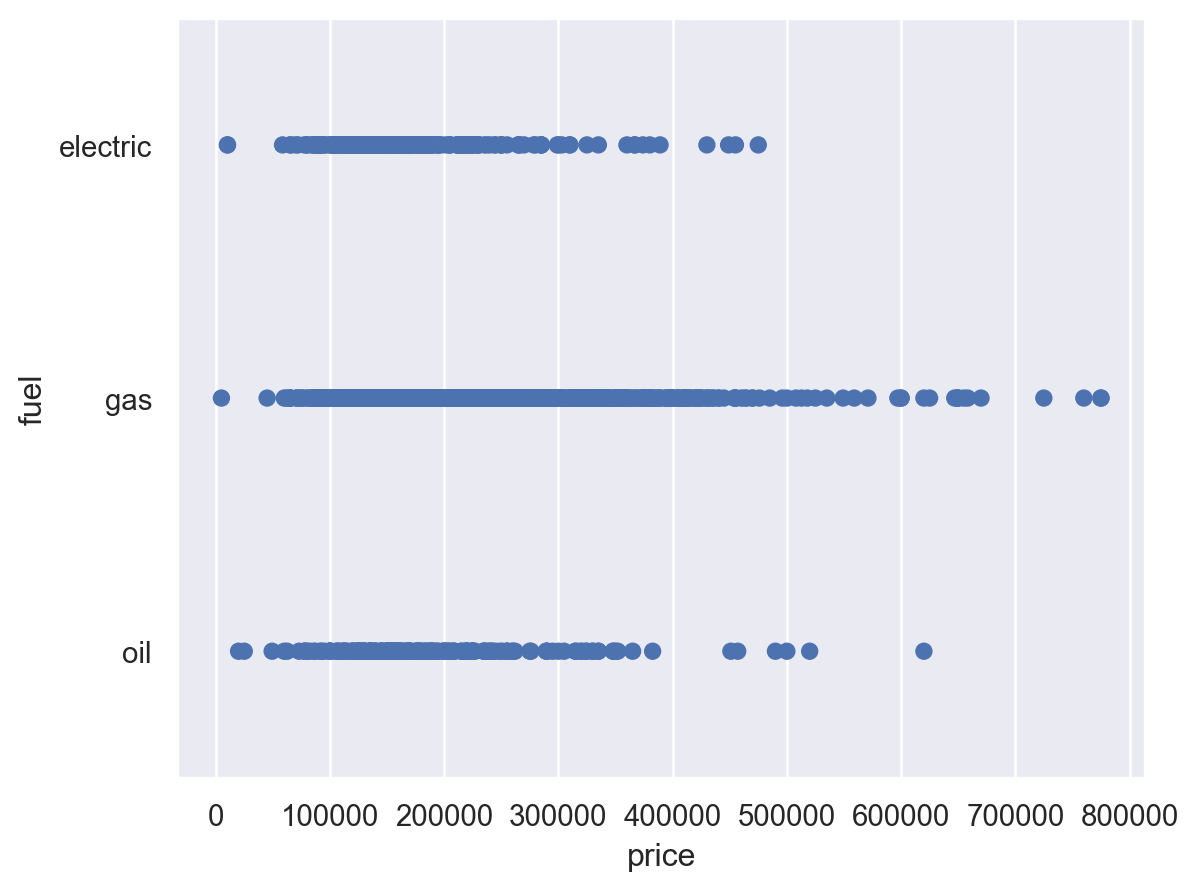

In [34]:
(
    so.Plot(houses, x="price", y="fuel")
    .add(so.Dot())
)

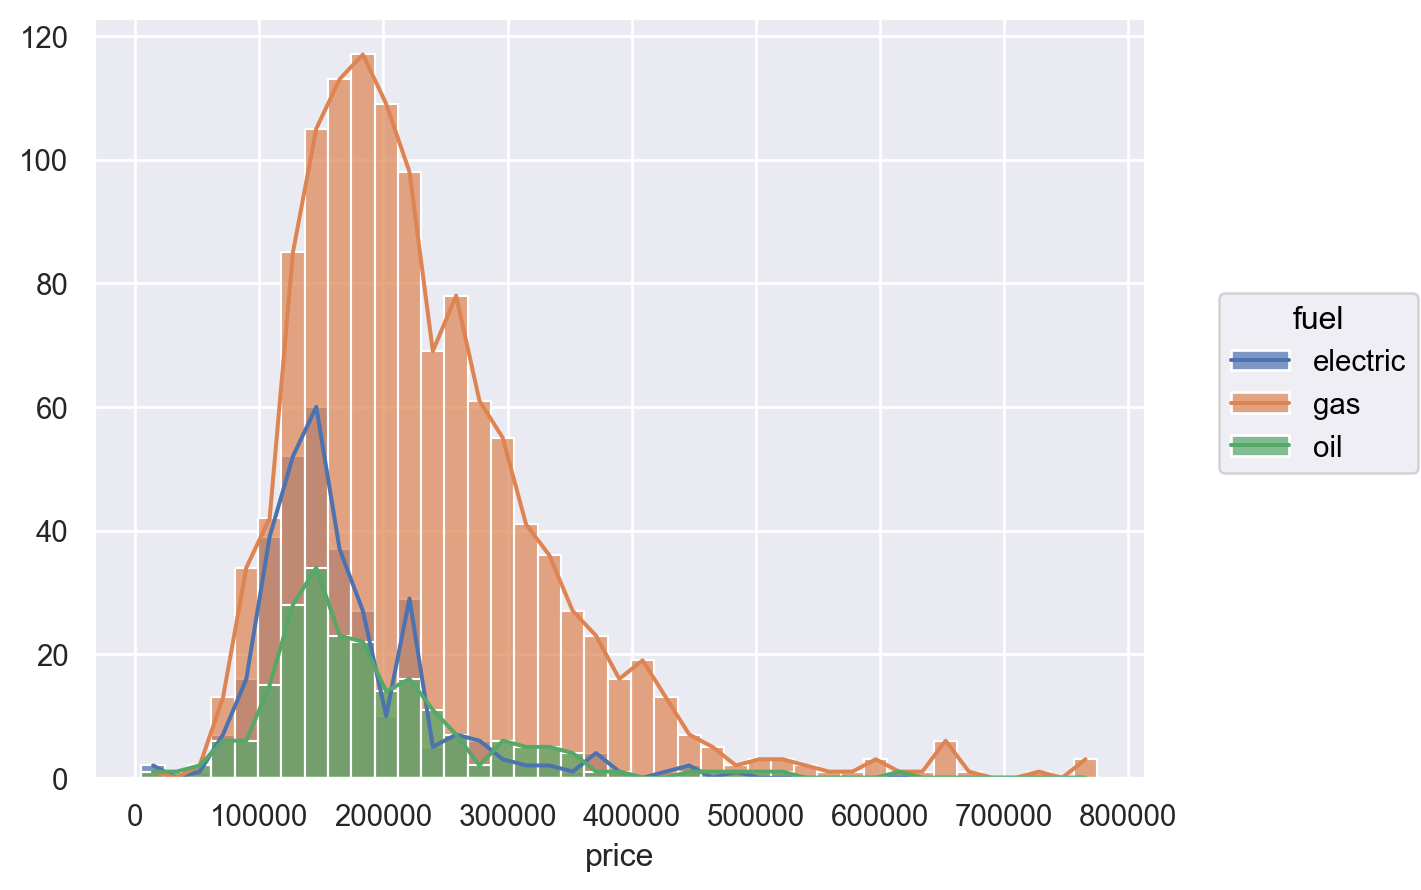

In [35]:
(
    so.Plot(houses, x = "price", color="fuel")
    .add(so.Bars(), so.Hist())
    .add(so.Line(), so.Hist())
)         

### Q. 집 값에 가장 크게 영향을 주는 요소는?
A. price와의 상관관계를 확인한 결과 livingArea, bathrooms, landValue, rooms 순으로 상관관계가 높게 나왔다. 가장 큰 영향을 주는 요소는 livingArea 임을 확인할 수 있었다.

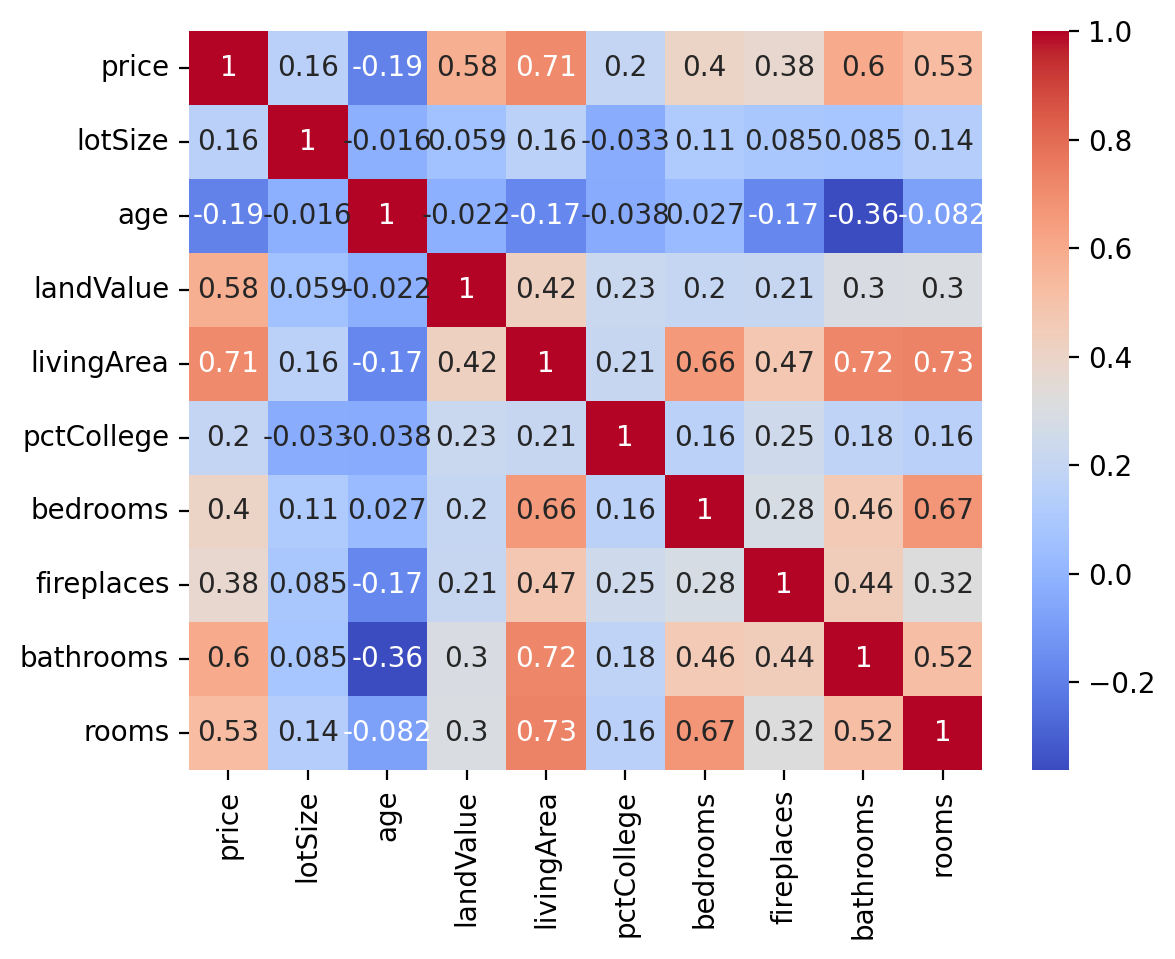

In [37]:
'''
문자열 열을 제외하고 숫자형 열만 선택 후 상관 관계 계산
이후 히트맵을 생성하여 상관관계를 조사
'''

numeric_columns = houses.select_dtypes(include=[np.number])

corr = numeric_columns.corr()

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

### Q. continuous 하지 않은 feature 들의 종류와 각 feature의 분포는 어떻게 될까?
A. 아래와 같이 분석할 수 있었다.
### Q. continuous 하지 않은 feature 중에서 집값과 관련이 있는 feature은 뭐가 있을까?
A. 각 feat 별로 조사 결과, 집값과 직접적으로 관련이 있는 feat은 없어 보인다.

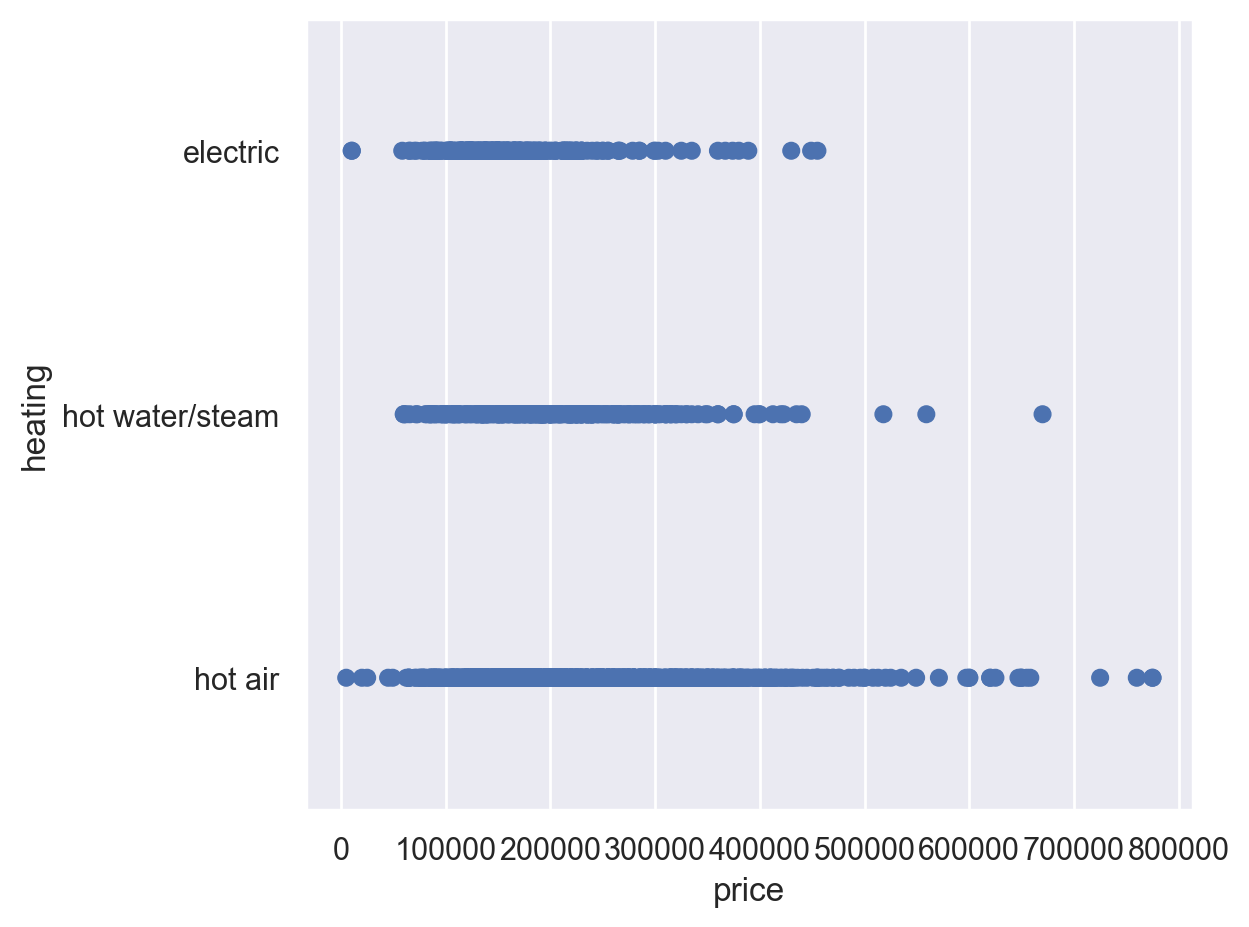

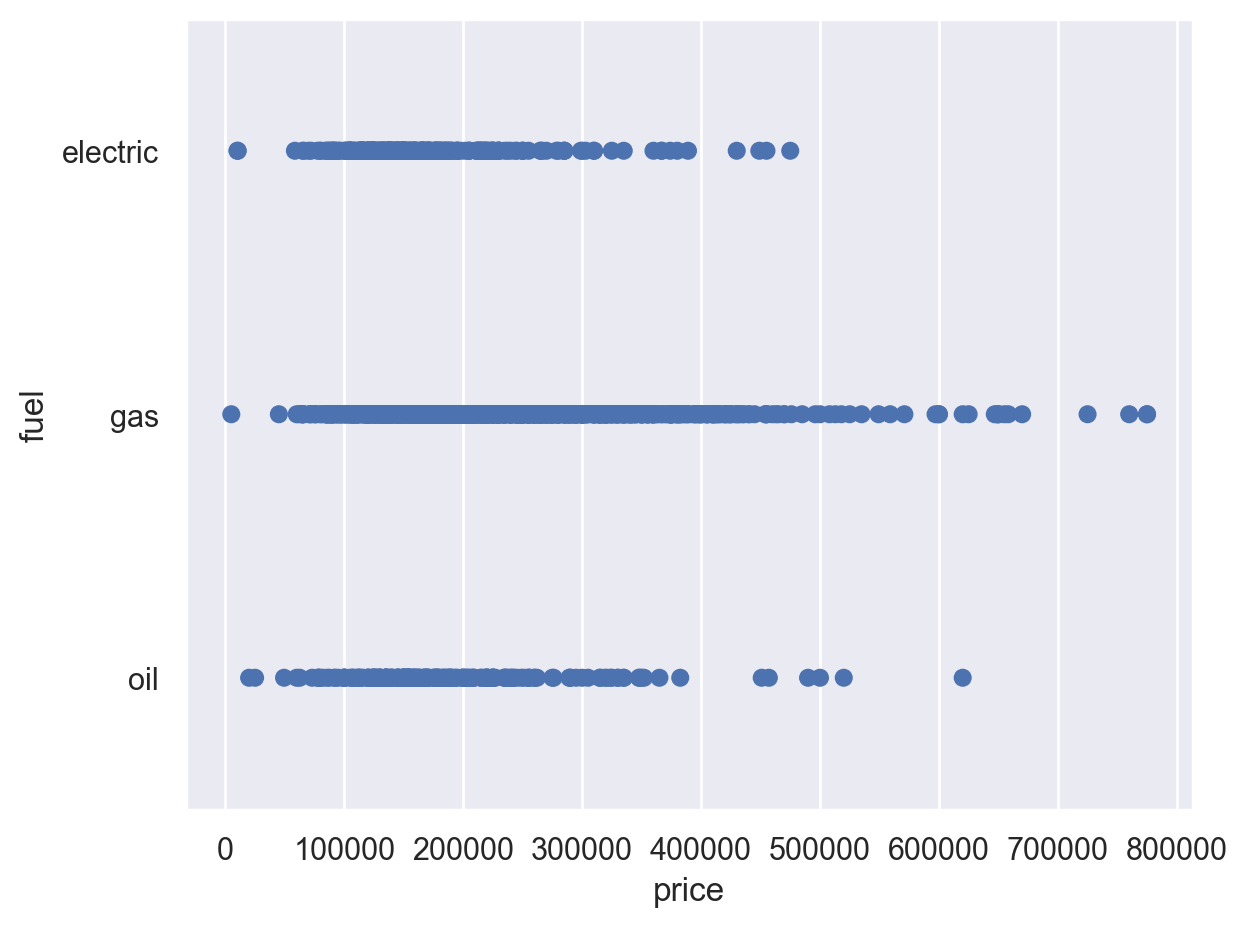

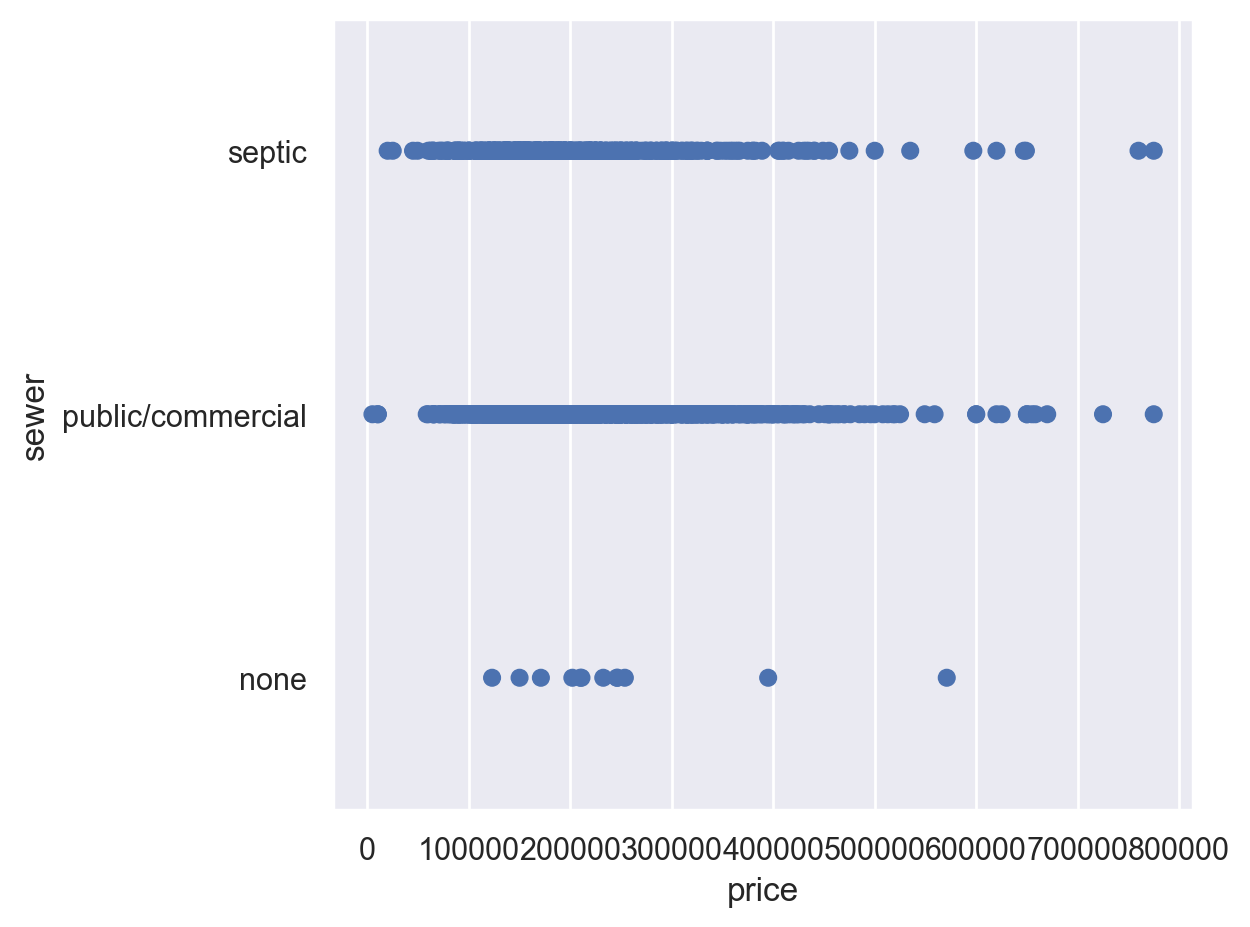

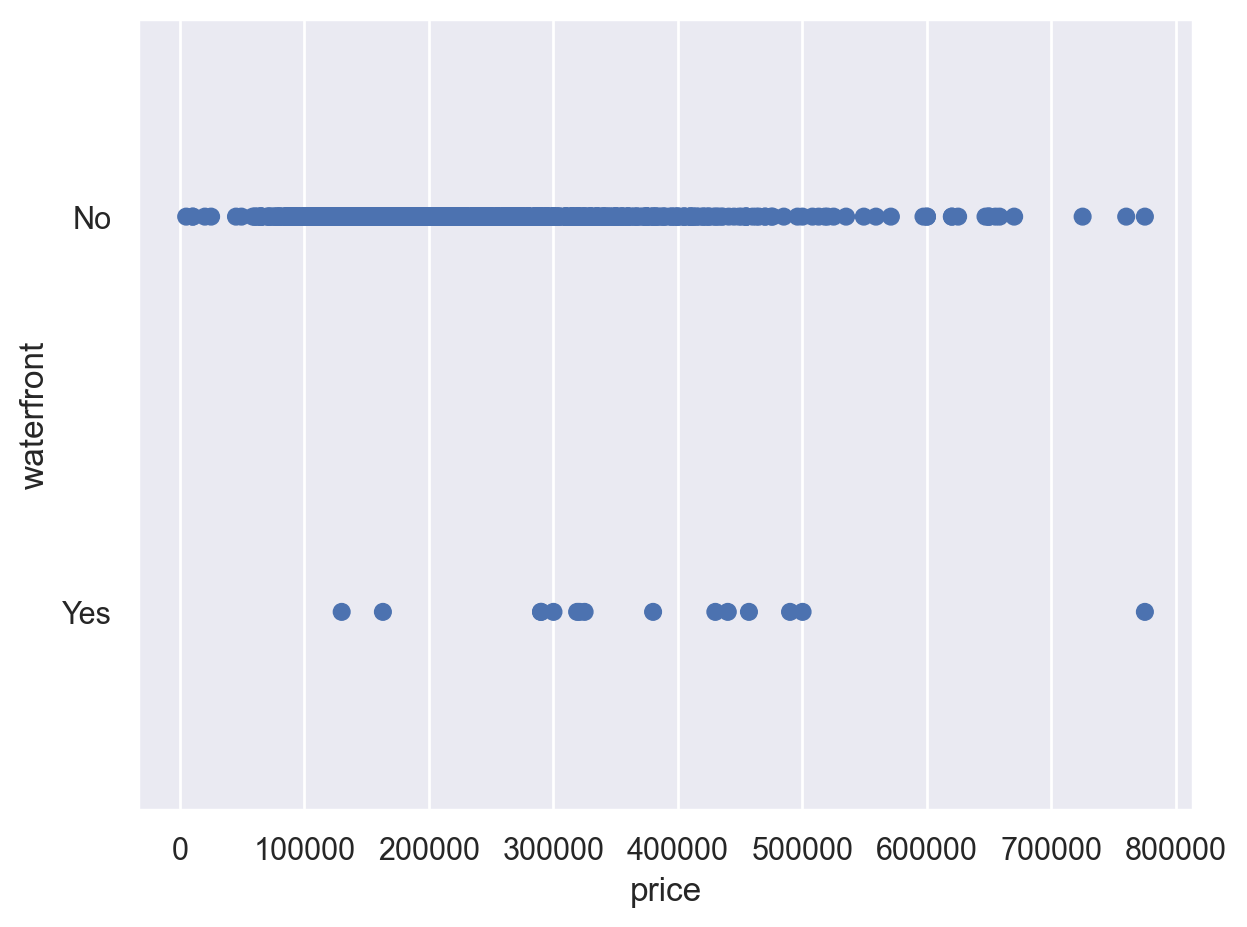

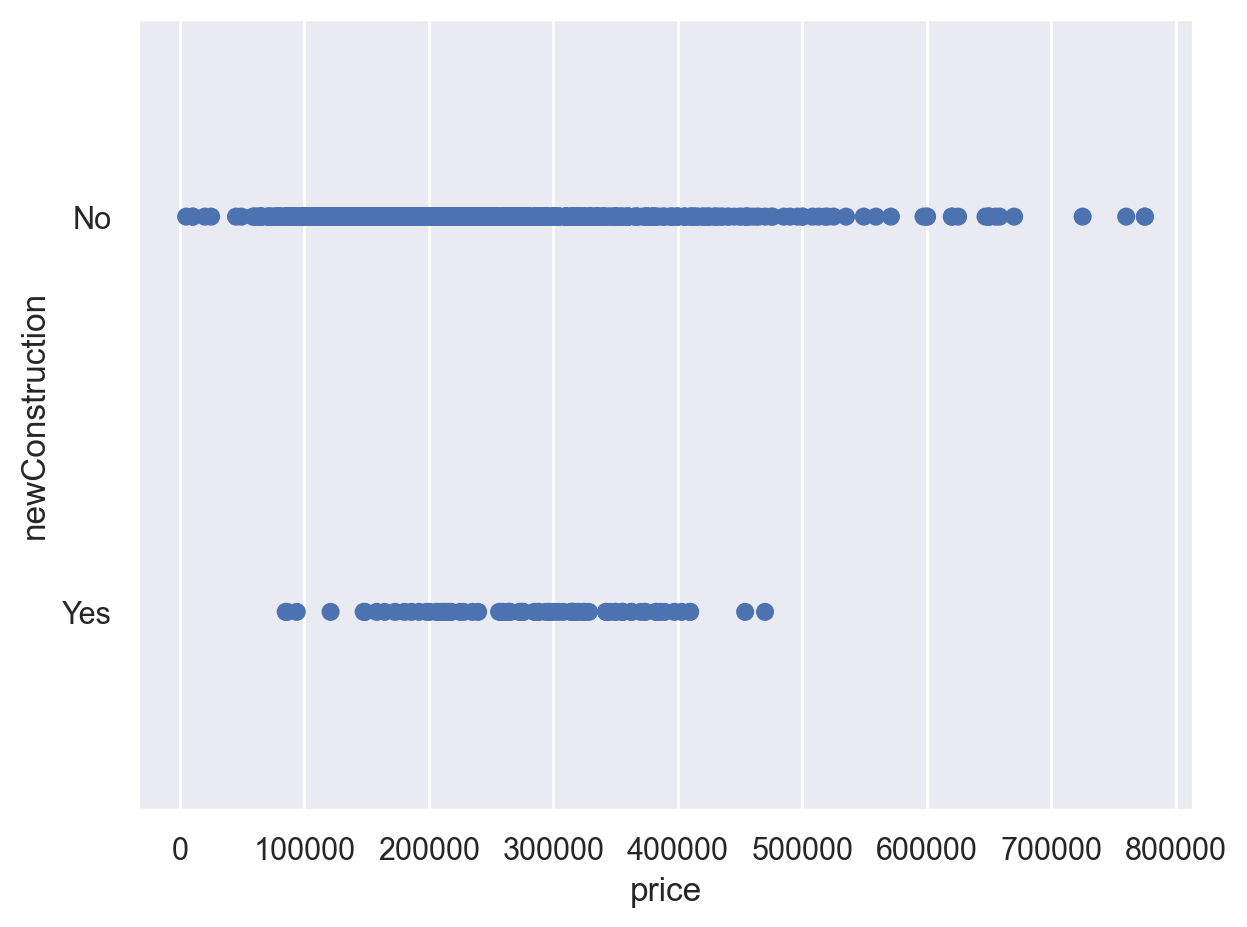

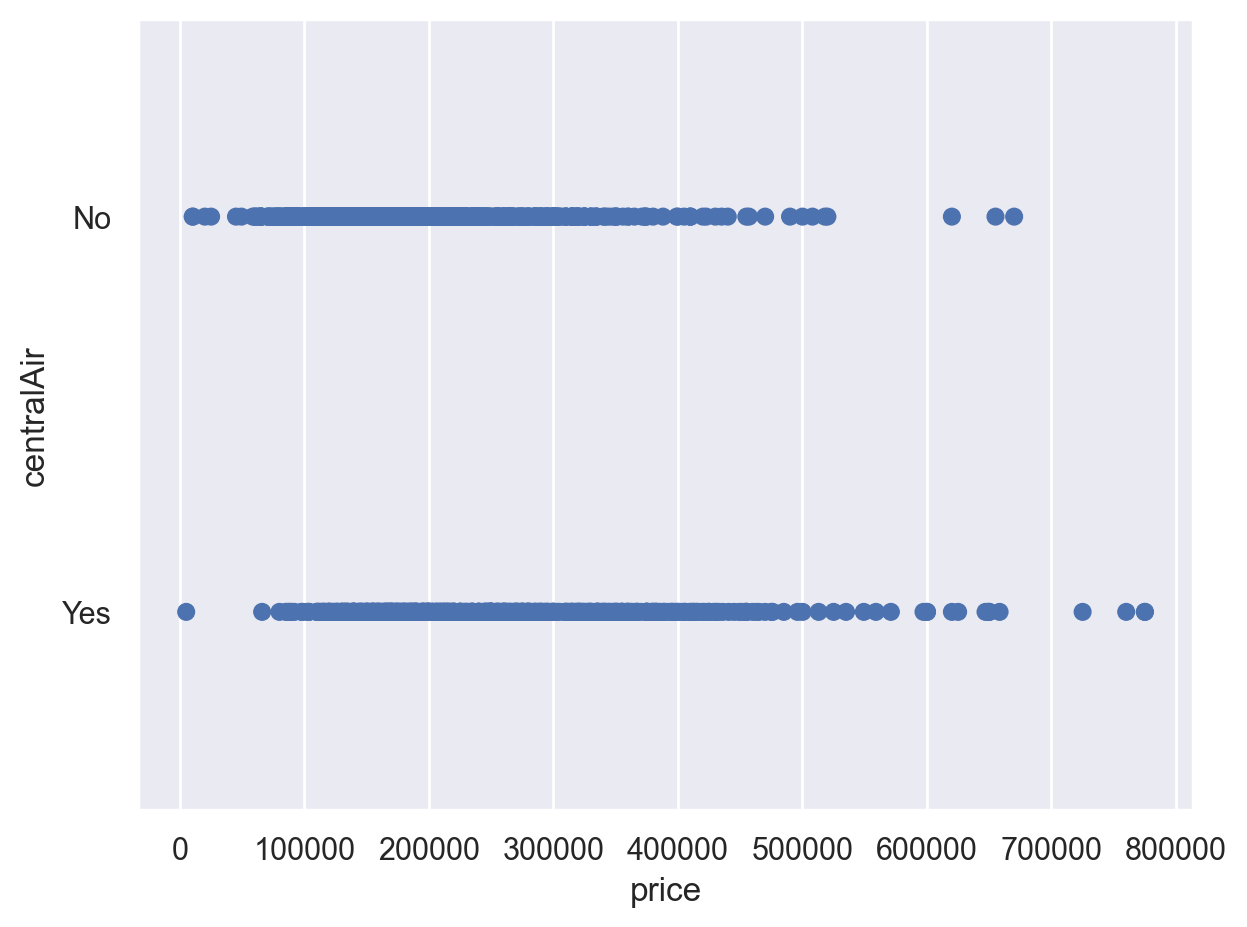

In [40]:
def house_price_relation(feat) :
    return (
        so.Plot(houses, x="price", y=feat)
        .add(so.Dot())
    )
    
for feat in ["heating", "fuel", "sewer", "waterfront", "newConstruction", "centralAir"] :
    house_price_relation(feat).show()

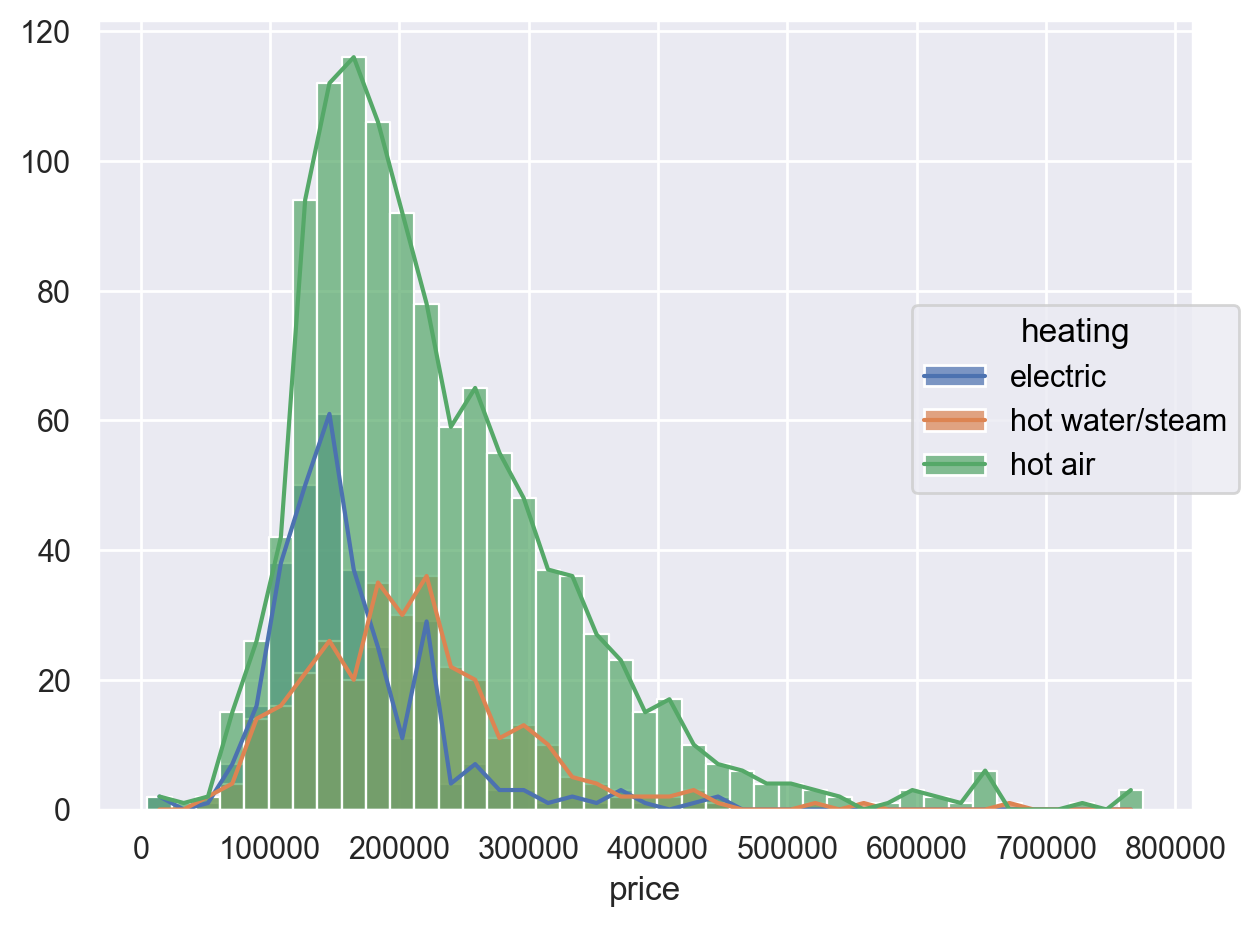

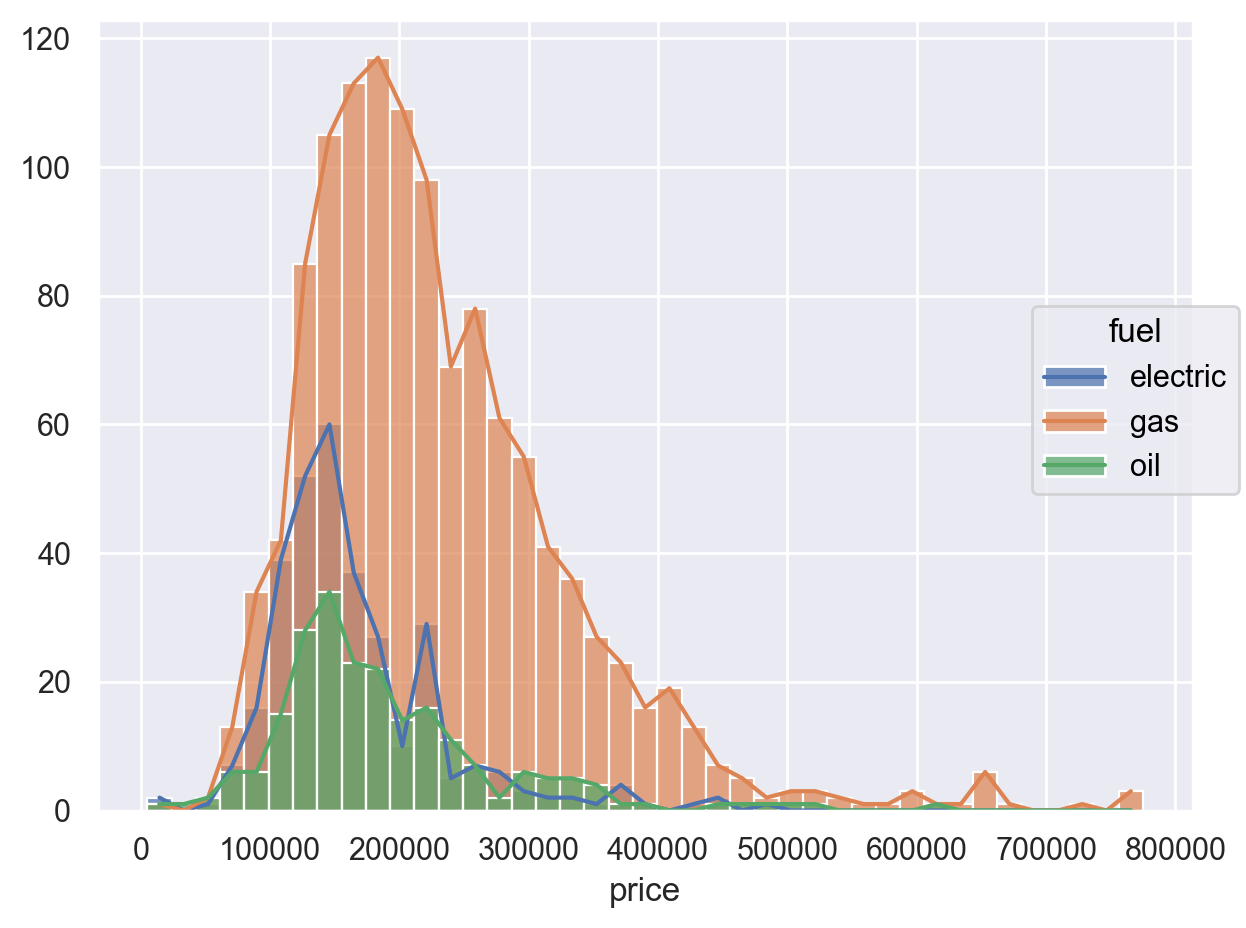

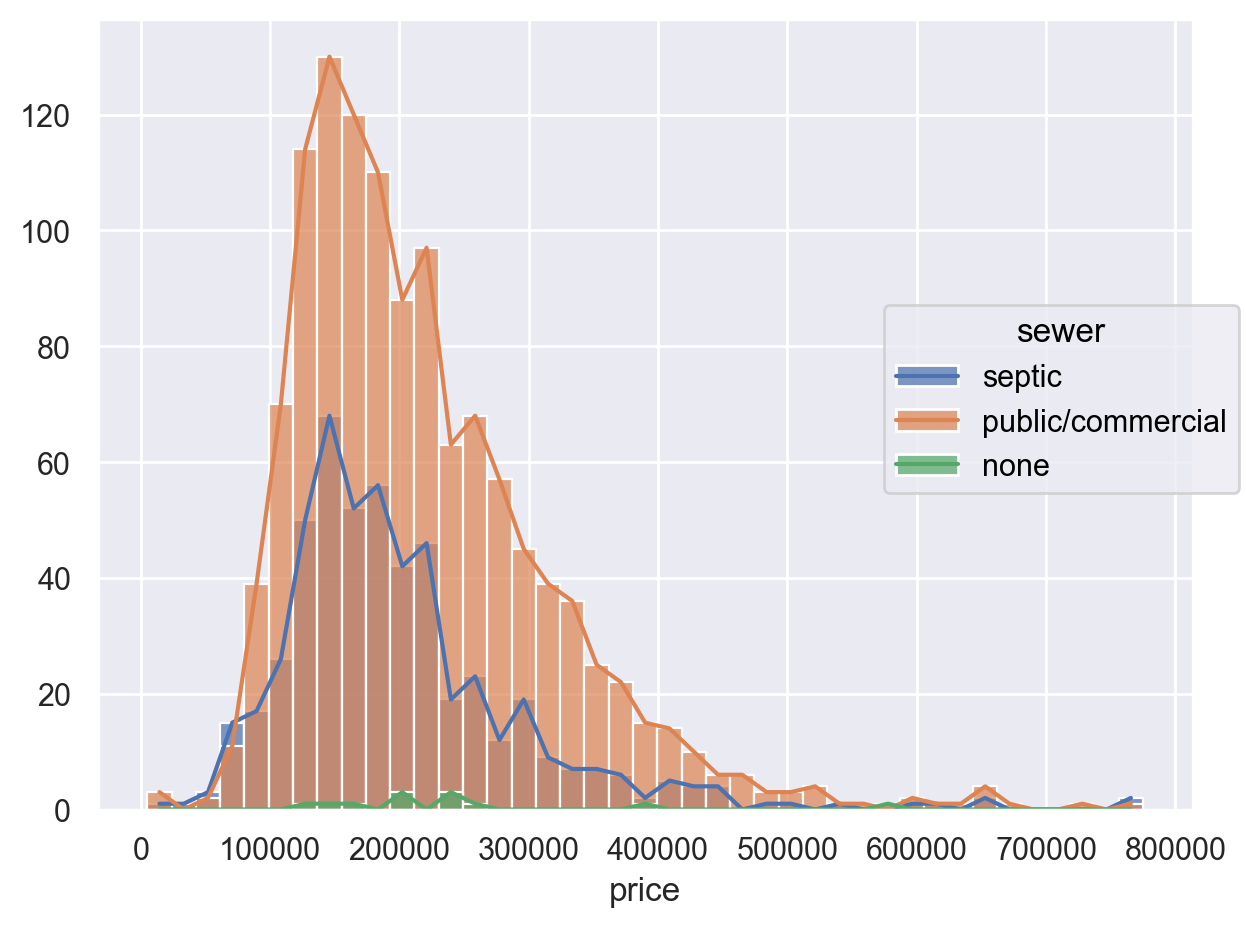

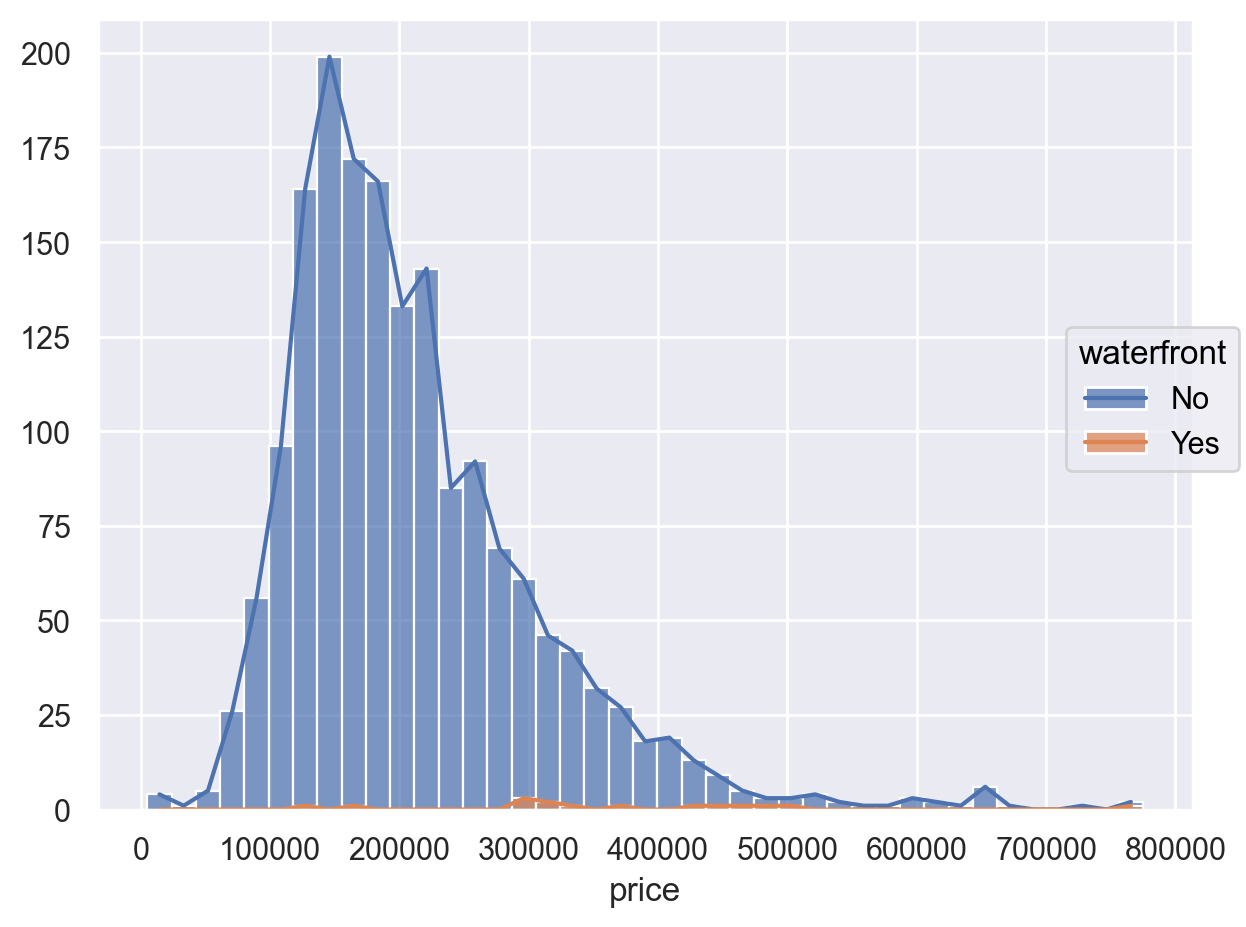

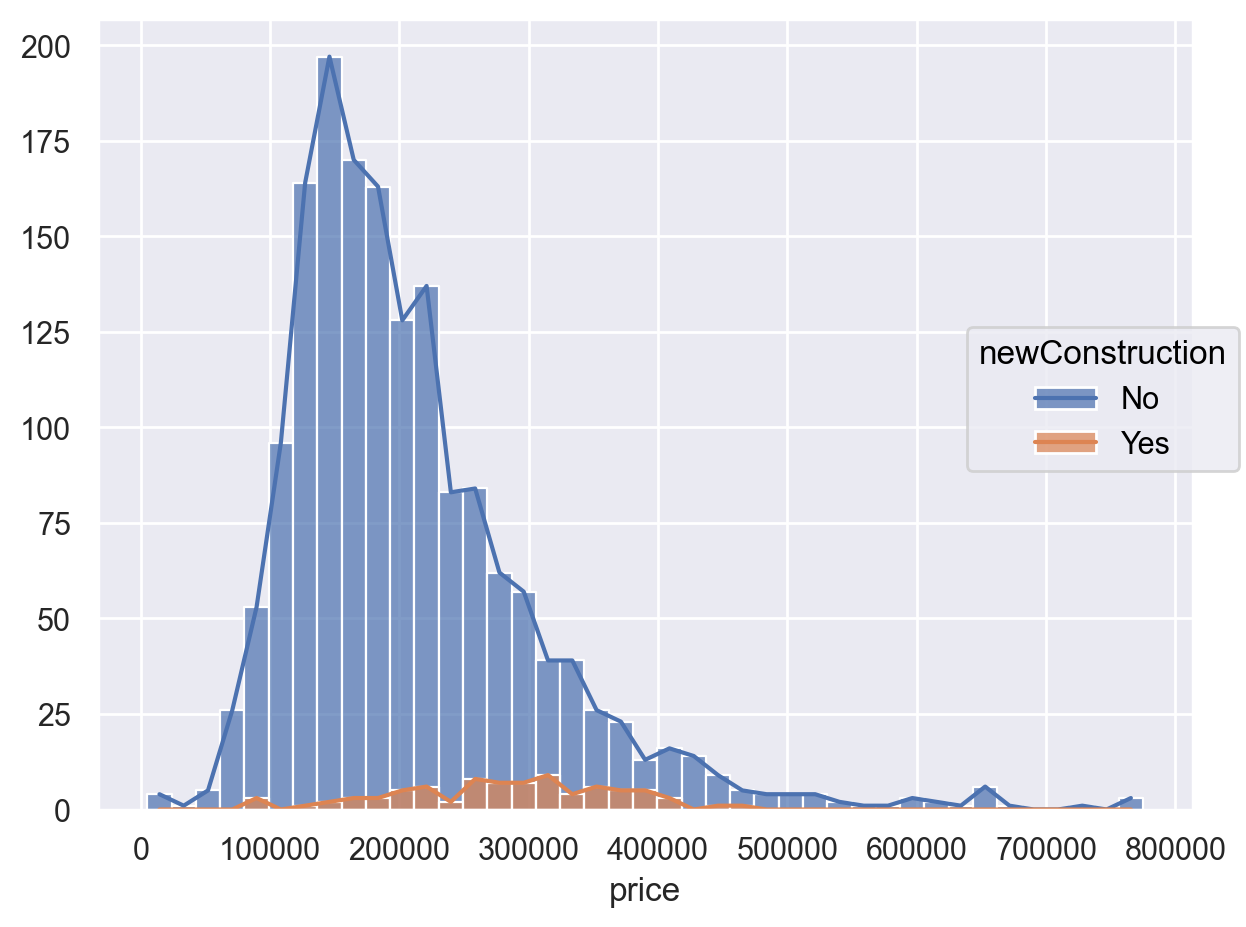

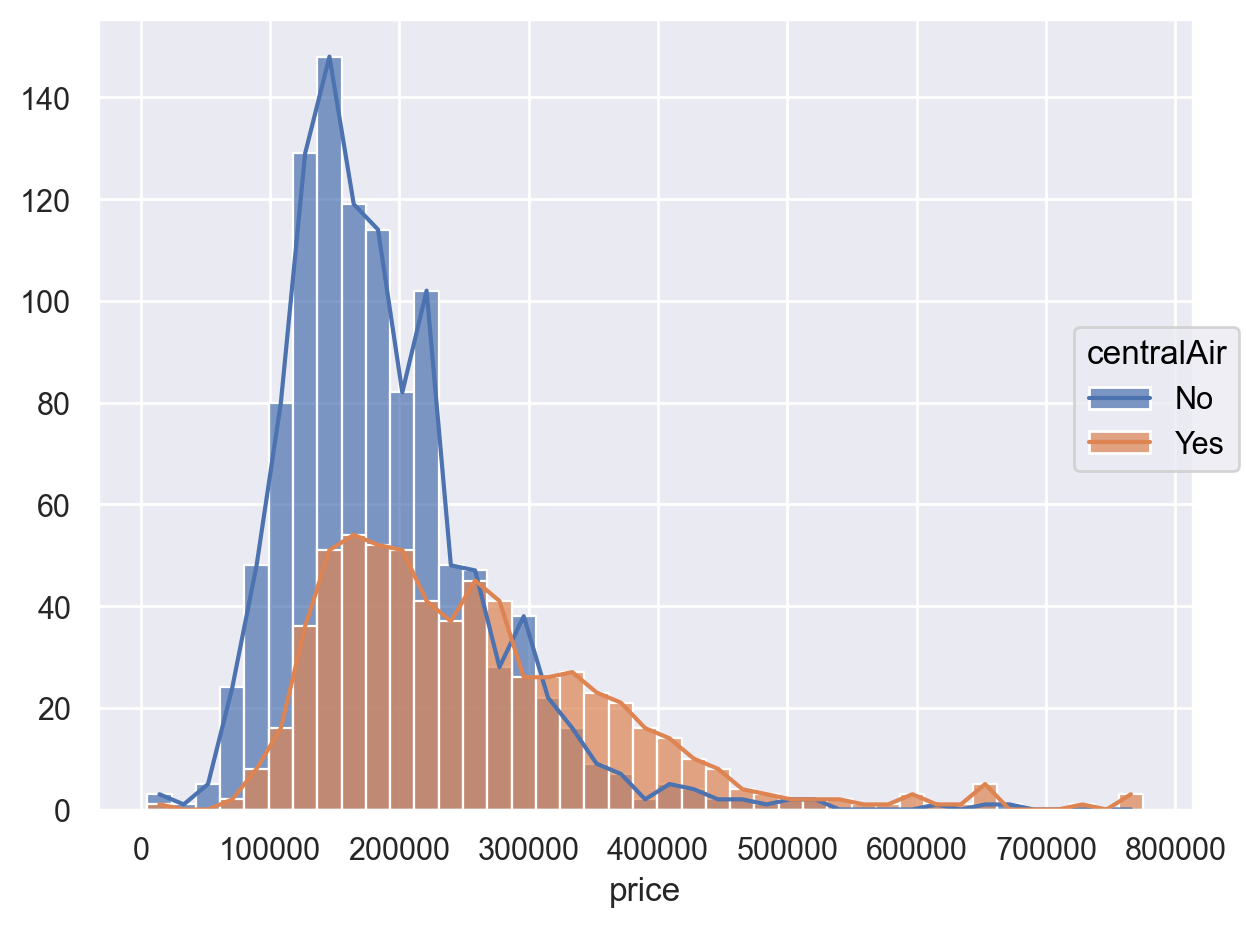

In [41]:
def house_price_relation(feat) :
    return (
    so.Plot(houses, x = "price", color=feat)
    .add(so.Bars(), so.Hist())
    .add(so.Line(), so.Hist())
)
    
for feat in ["heating", "fuel", "sewer", "waterfront", "newConstruction", "centralAir"] :
    house_price_relation(feat).show()

### Q. livingArea 와 price 간의 상관관계는 어떻게 되는가?
A. livingArea 와 price 간에는 선형적인 관계가 있는 것 처럼 보인다. 또한, price가 올라갈 수록 대체적으로 room 수 또한 많아짐을 확인할 수 있다.

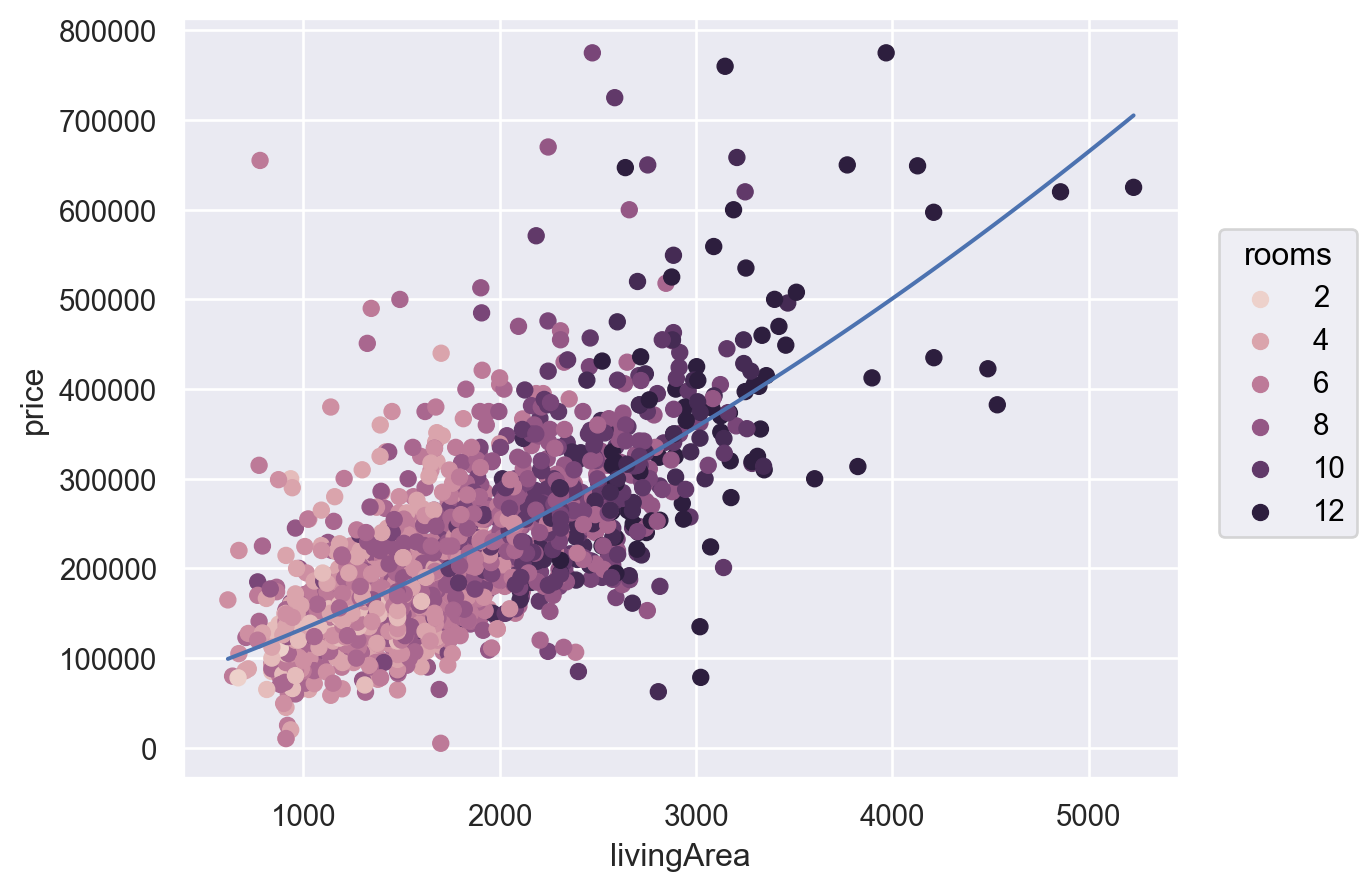

In [52]:
(
    so.Plot(houses, x="livingArea", y="price")
    .add(so.Dot(), color="rooms")
    .add(so.Line(), so.PolyFit(2))
)

### Q. bedroom은 pirce에 영향을 준다고 할 수 있는가?
A. bedrooom의 수가 많을 수록 price가 올라가는 추세이긴 하나, bedroom이 작은 표본에서 많은 이상치가 나왔다. bedroom의 수가 절대적으로 영향을 주지는 않는 것 처럼 보인다.

### Q. room은 price에 영향을 준다고 할 수 있는가?
A. room 수가 늘어남에 따라 price의 평균값 등은 대체적으로 올라감을 확인할 수 있다. 또한, room의 수가 작은 경우 대체적으로 price가 싼 곳에 몰려있음을 확인할 수 있다.

<Axes: xlabel='bedrooms', ylabel='price'>

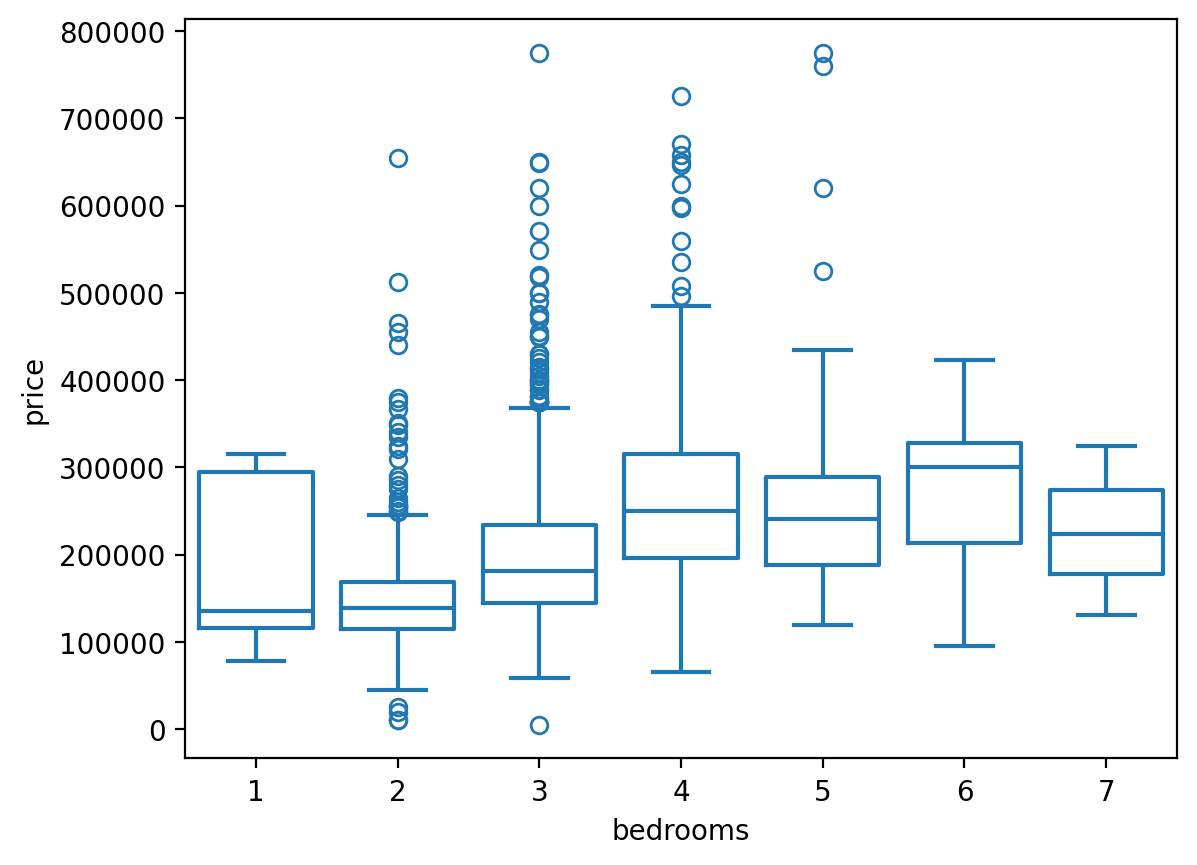

In [44]:
sns.boxplot(houses, x="bedrooms", y="price", fill=False)

<Axes: xlabel='rooms', ylabel='price'>

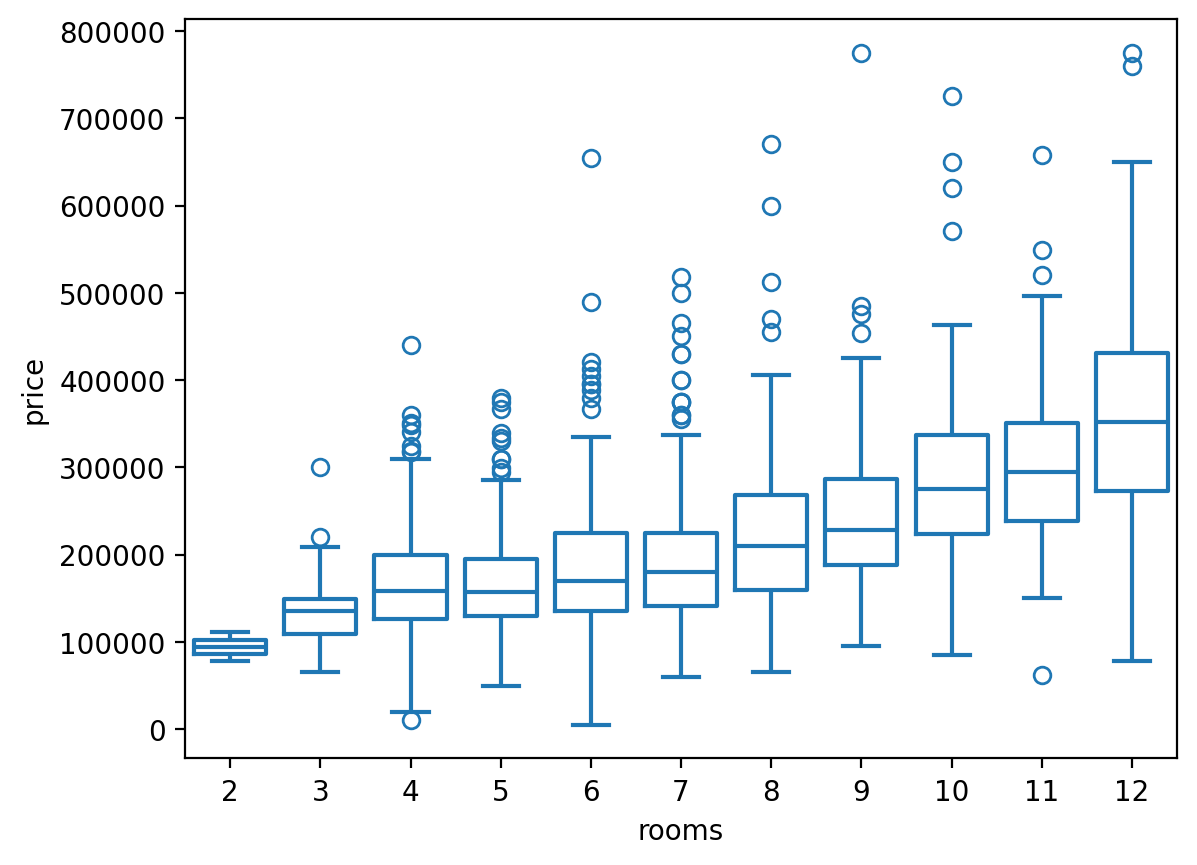

In [45]:
sns.boxplot(houses, x="rooms", y="price", fill=False)

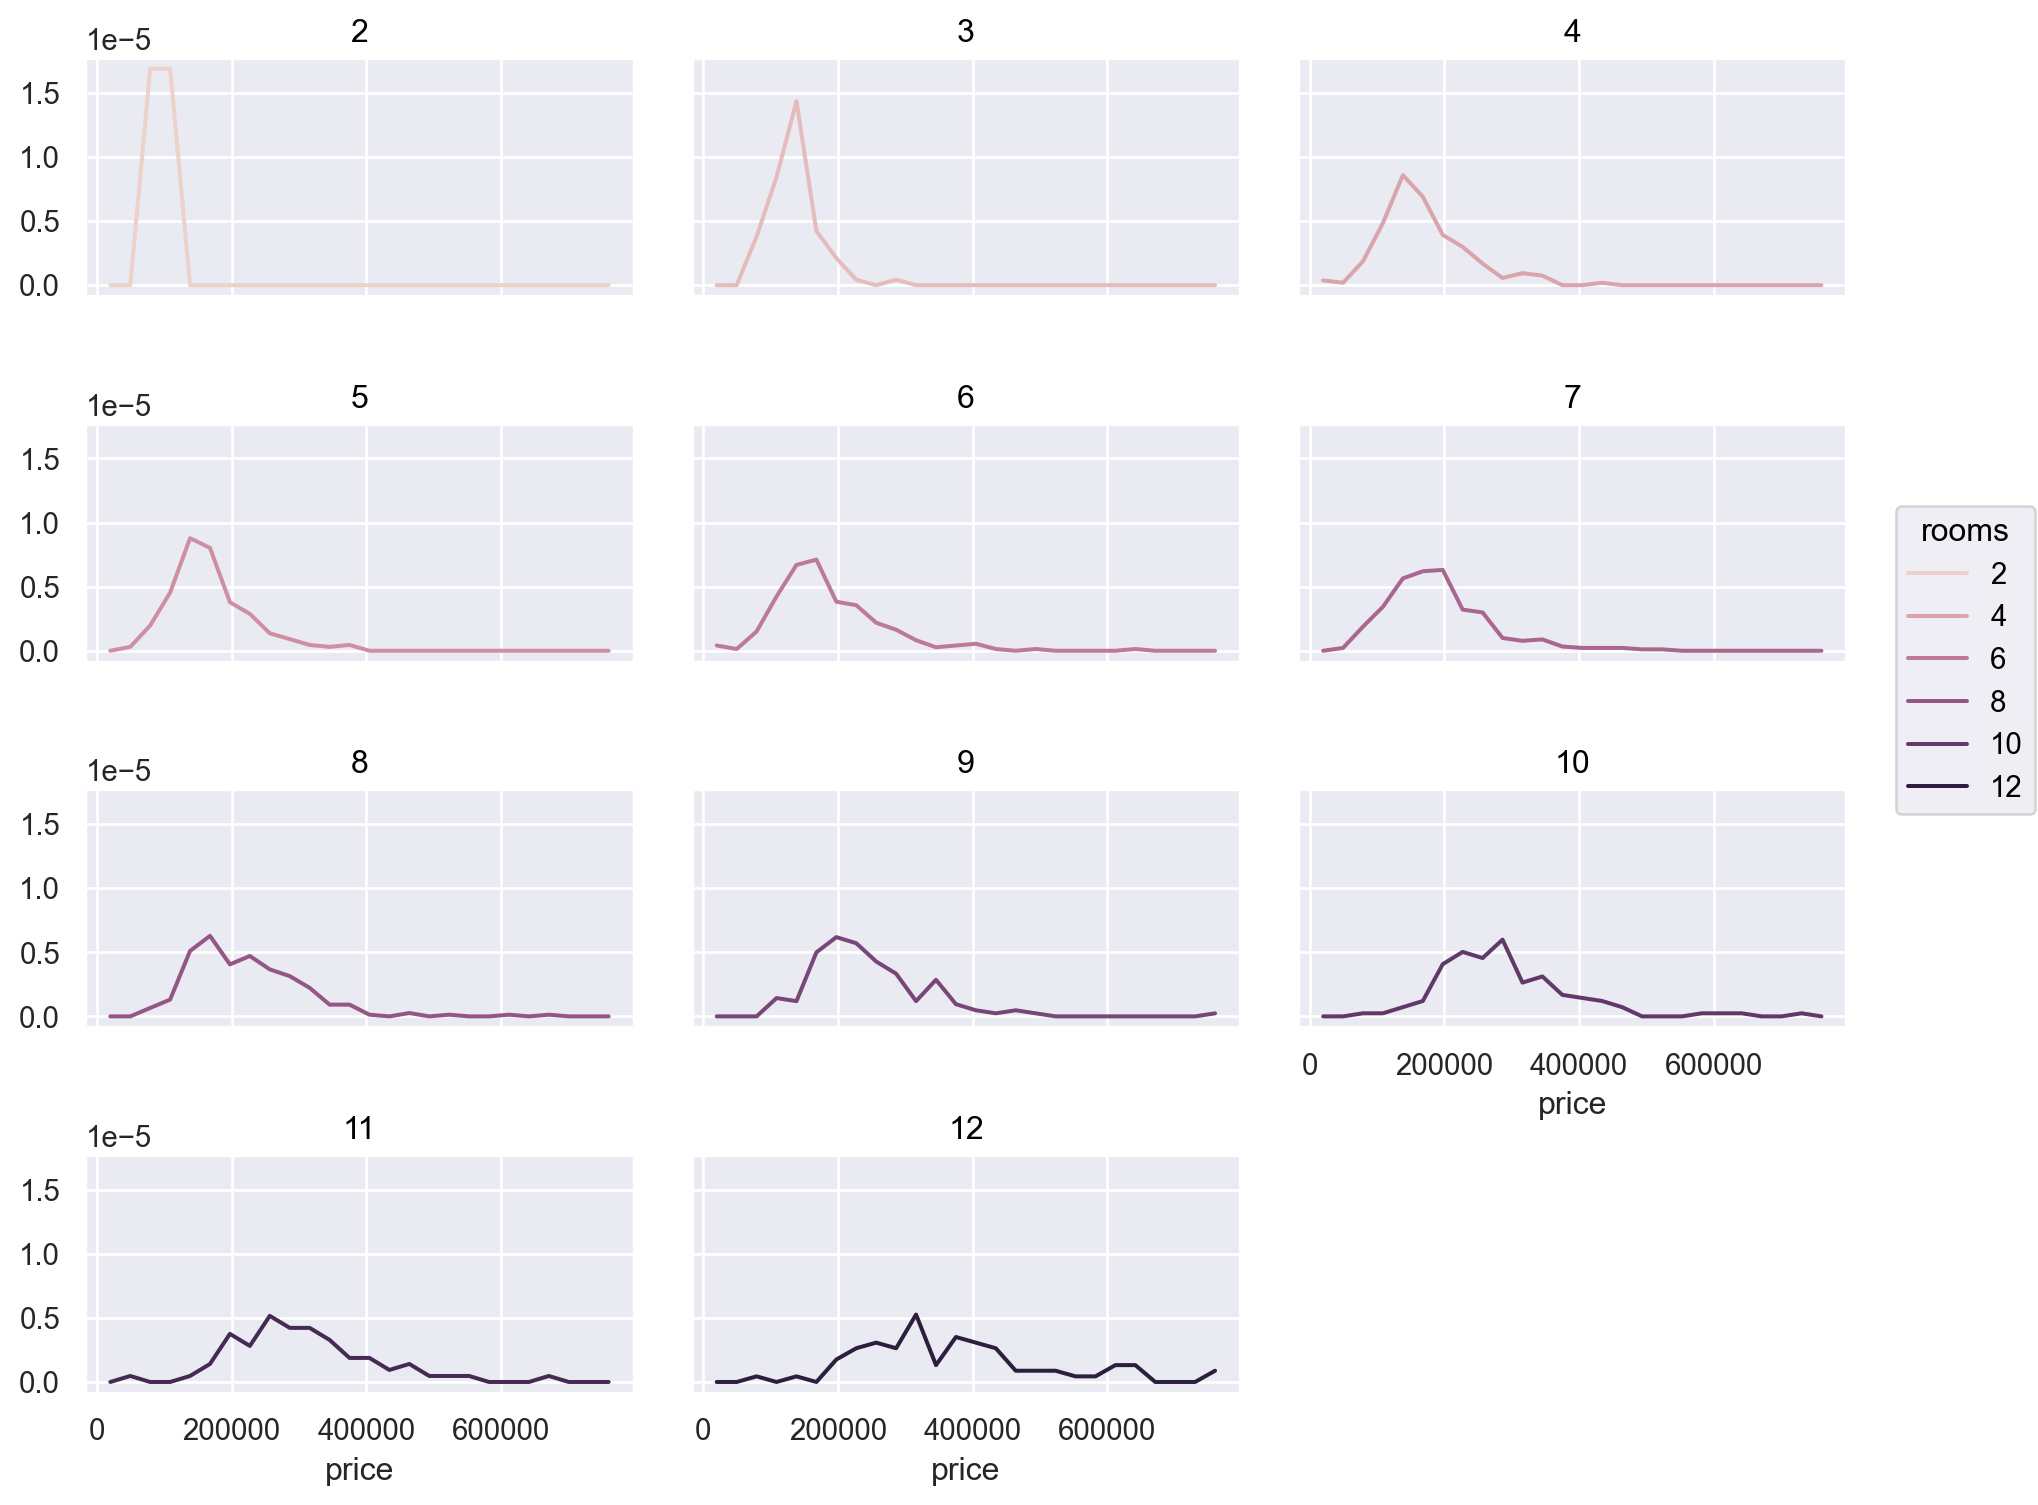

In [53]:
(
    so.Plot(houses, x = "price" , color = "rooms")
    .add(so.Line(), so.Hist(binwidth = 30000, stat = "density"))
    .facet("rooms", wrap=3)
    .layout(size=(10, 8))
)

### Q. 상관관계 히트맵에서 집값과 관계가 적었던 feature들은 과연 집값과 전혀 관계가 없을까?
A. 직접 시각적으로 분석해본 결과, 실제로 집값에 크게 영향을 주지 않음을 알 수 있었다.

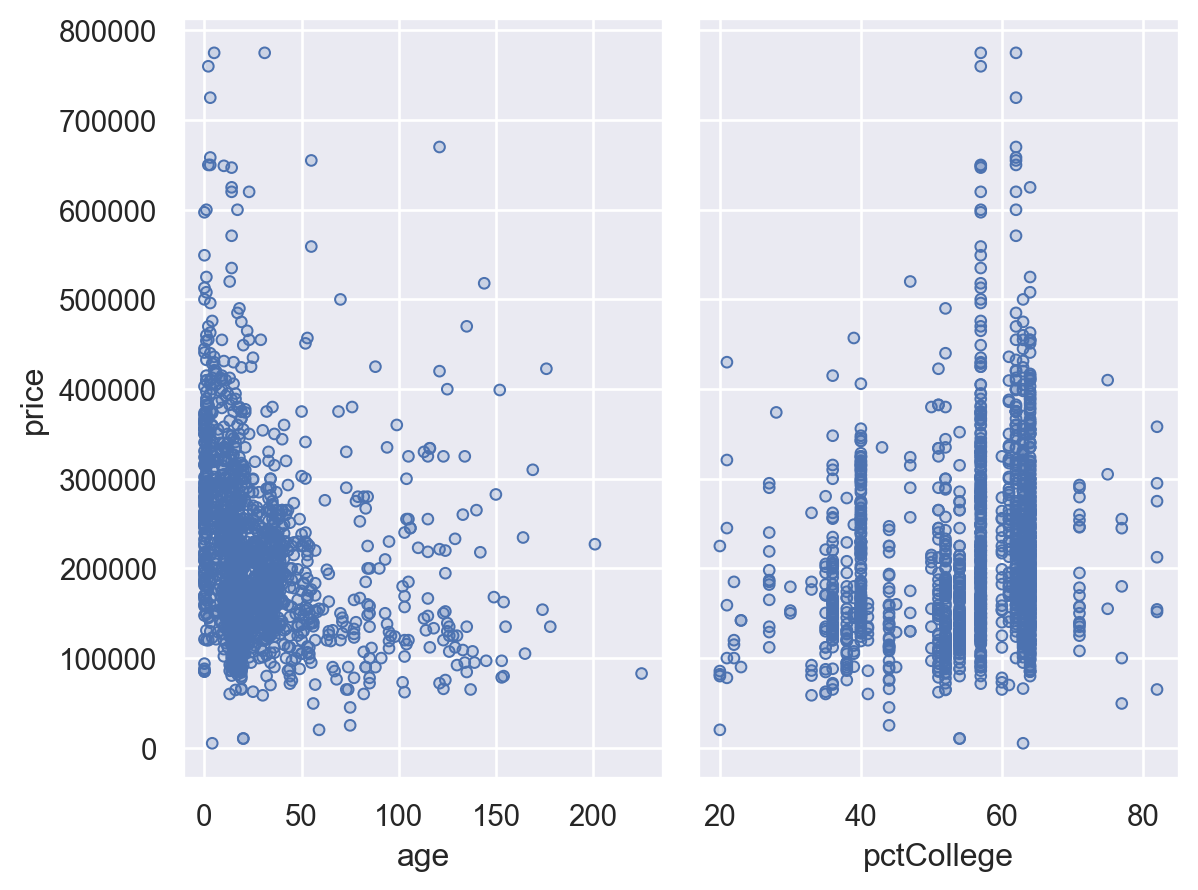

In [60]:
(
    so.Plot(houses, y="price")
    .pair(x=["age", "pctCollege"])
    .add(so.Dots())
)

### Q. livingArea와 price의 상관관계를 시각적으로 다양하게 표현할 수는 없을까? 
A. 다음과 같이 시각화하여 분석하였다.

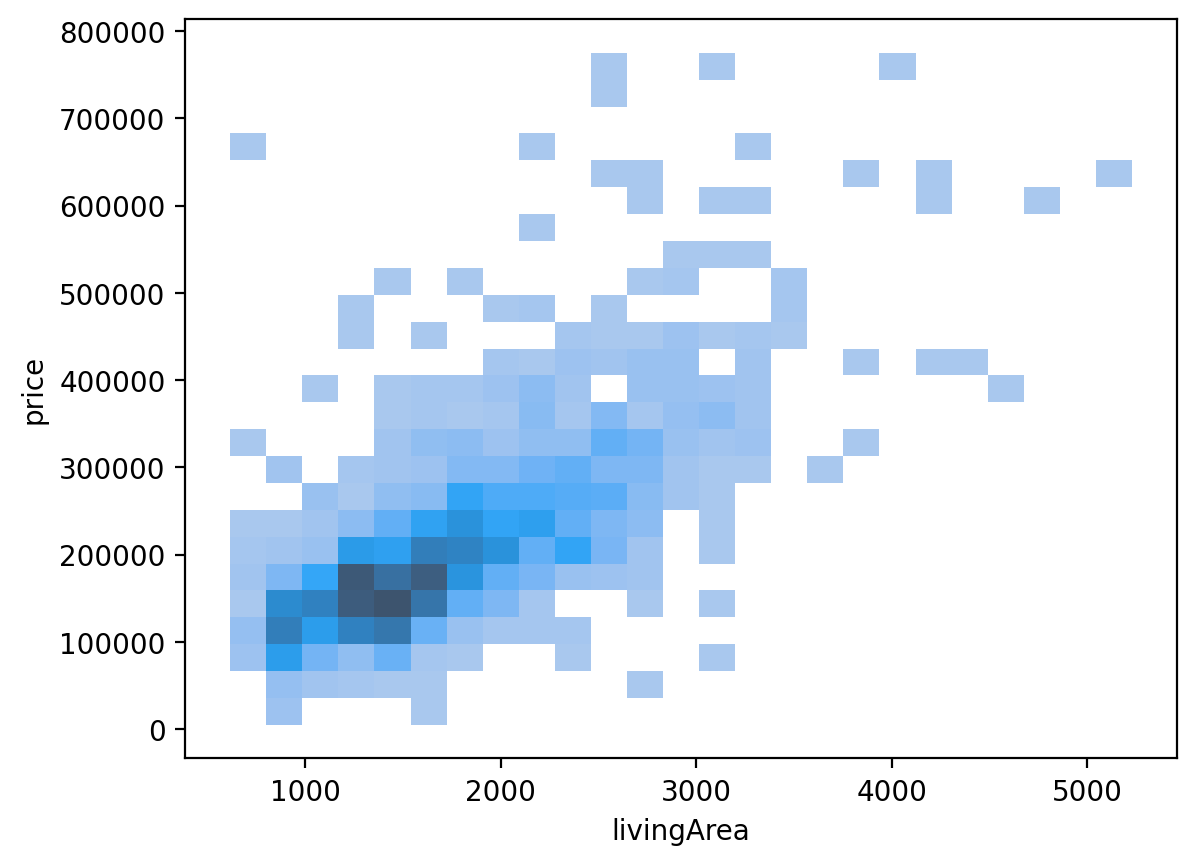

In [62]:
sns.histplot(houses, x="livingArea", y="price", bins = 25)
plt.show()

In [63]:
houses_livingArea = houses.query("livingArea < 3000").assign(
    livingArea_cat=lambda x: pd.cut(x.livingArea, 20, labels=False),
    livingArea_qcat=lambda x: pd.qcut(x.livingArea, 20, labels=False),
)

<Axes: xlabel='livingArea_cat', ylabel='price'>

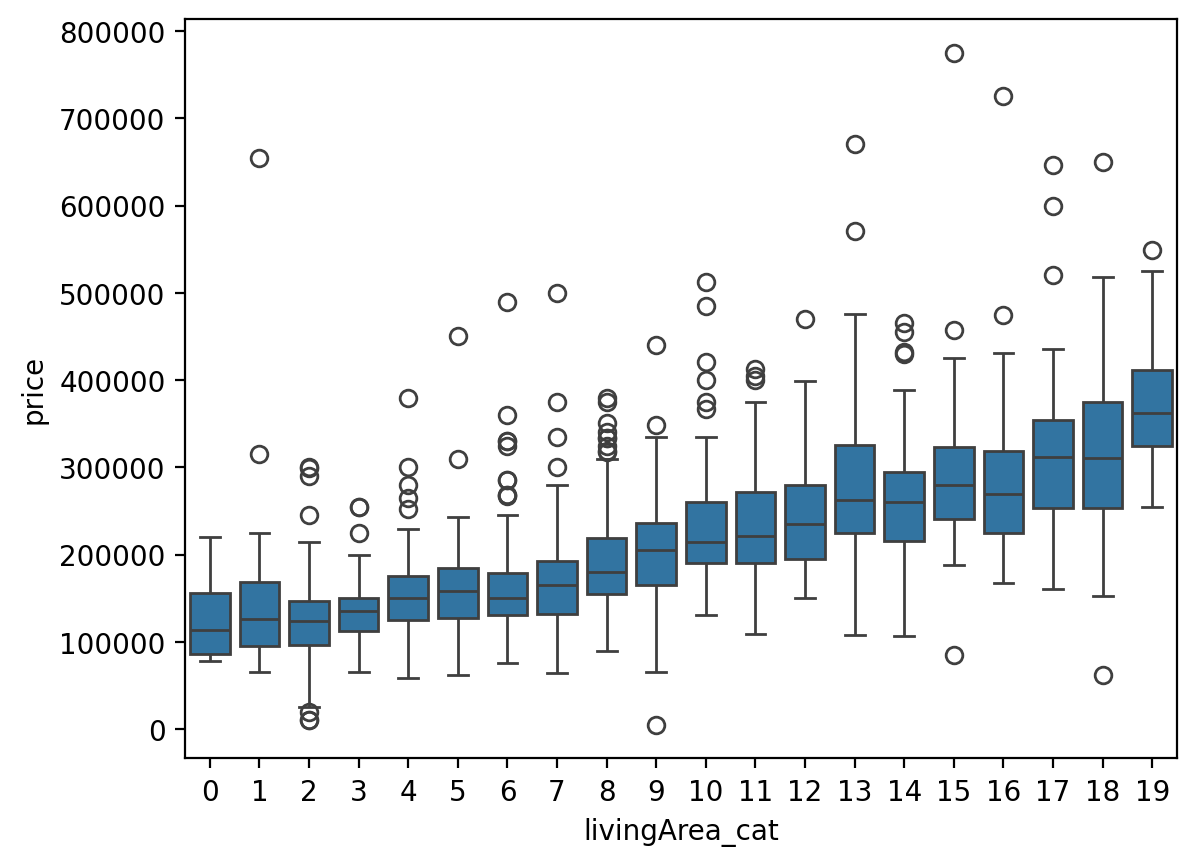

In [64]:
sns.boxplot(houses_livingArea, x="livingArea_cat", y="price")

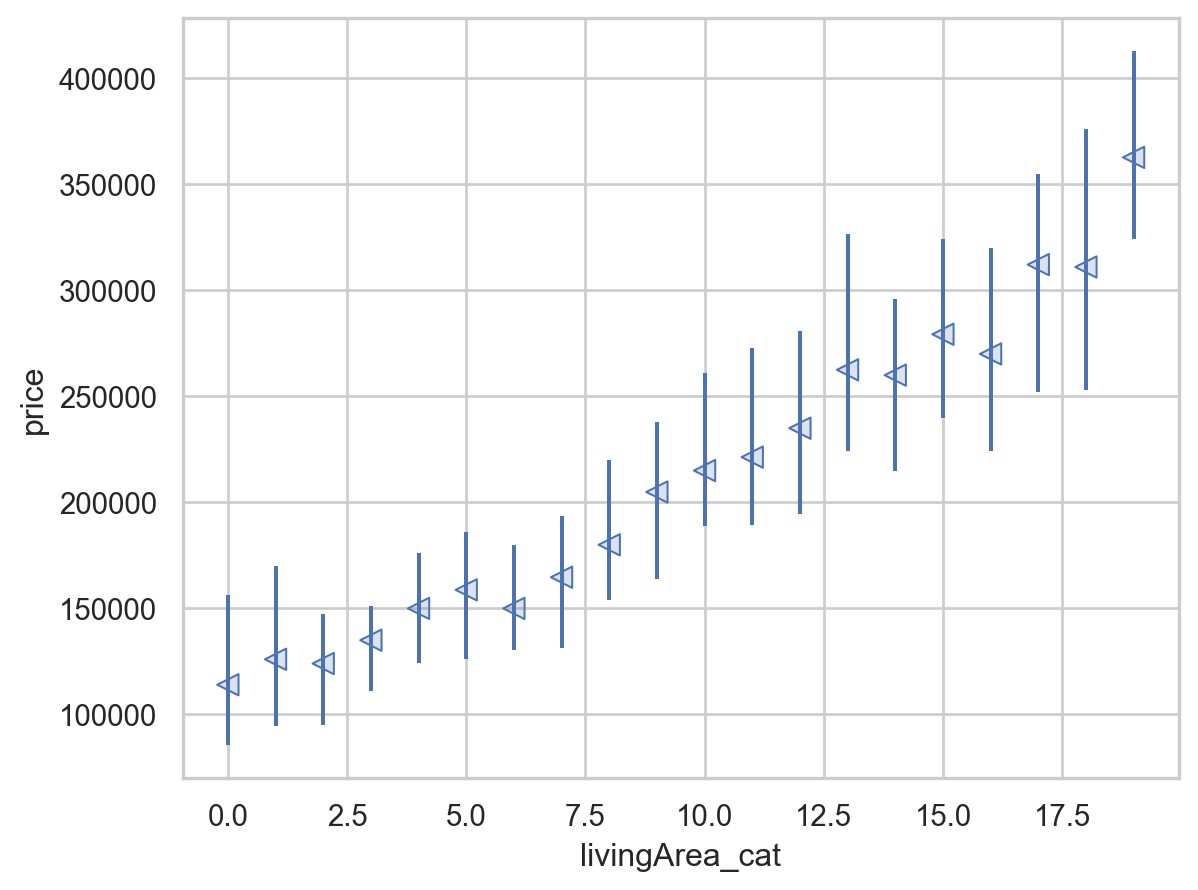

In [66]:
def rangeplot(df, x, y, color=None, alpha=0.1, marker="<"):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker=marker), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

rangeplot(houses_livingArea, x="livingArea_cat", y="price")